In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls

Dataset2.csv README.md    eda.ipynb


In [3]:
df = pd.read_csv('Dataset2.csv')

In [4]:
df

,Days,Advertiser verticals,Device categories,Creative size,Buyer networks,Revenue,Ad impressions,Ad eCPM (£)
0,6/1/20,Autos & Vehicles,Desktop,Native,Agency B,£39.58,48545,£0.82
1,6/1/20,Apparel,Desktop,300x250,Agency B,£9.04,47784,£0.19
2,6/1/20,Autos & Vehicles,High-end mobile devices,Native,Agency B,£44.58,45416,£0.98
3,6/1/20,Apparel,Desktop,970x250,Agency B,£8.61,27105,£0.32
4,6/1/20,"Hobbies, Games & Leisure",Desktop,300x250,Agency B,£4.80,22408,£0.21
...,...,...,...,...,...,...,...,...
29075,6/30/20,Home & Garden,High-end mobile devices,300x600,Agency D,£0.00,2,£1.61
29076,6/30/20,Law & Government,High-end mobile devices,300x600,Agency D,£0.00,2,£1.59
29077,6/30/20,Health,Connected TV,300x600,Agency B,£0.00,2,£1.38
29078,6/30/20,Travel & Tourism,Desktop,728x90,Agency D,£0.00,2,£1.31


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29080 entries, 0 to 29079
Data columns (total 8 columns):
Days                    29080 non-null object
Advertiser verticals    29080 non-null object
Device categories       29080 non-null object
Creative size           29080 non-null object
Buyer networks          29080 non-null object
Revenue                 29080 non-null object
Ad impressions          29080 non-null int64
Ad eCPM (£)             29080 non-null object
dtypes: int64(1), object(7)
memory usage: 1.8+ MB


In [126]:
df_inter = df.loc[df['Creative size']=='Interstitial']

In [128]:
df_inter['Device categories'].value_counts()

High-end mobile devices    948
Tablets                    710
Connected TV                35
Name: Device categories, dtype: int64

In [6]:
df['Days'] = pd.to_datetime(df['Days'])

In [7]:
df['Ad eCPM (£)']= df['Ad eCPM (£)'].str.replace("£", " ")
df['Revenue']= df['Revenue'].str.replace("£", " ")

In [8]:
df['Ad eCPM (£)'] = df['Ad eCPM (£)'].astype(float)
df['Revenue'] = df['Revenue'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29080 entries, 0 to 29079
Data columns (total 8 columns):
Days                    29080 non-null datetime64[ns]
Advertiser verticals    29080 non-null object
Device categories       29080 non-null object
Creative size           29080 non-null object
Buyer networks          29080 non-null object
Revenue                 29080 non-null float64
Ad impressions          29080 non-null int64
Ad eCPM (£)             29080 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.8+ MB


In [10]:
df['Revenue'].sum()

42973.01

In [11]:
sum_b = df.loc[df['Buyer networks']== 'Agency B']

In [12]:
sum_b['Revenue'].sum()

31267.71

In [13]:
sum_d = df.loc[df['Buyer networks']== 'Agency D']
sum_d['Revenue'].sum()

241.29

In [113]:
second = df['Revenue']

In [115]:
second.to_csv('lineee')

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


0                                                    39.58
1                                                     9.04
2                                                    44.58
3                                                     8.61
4                                                      4.8
                               ...                        
29076                                                    0
29077                                                    0
29078                                                    0
29079                                                    0
CPM      0        0.82
1        0.19
2        0.98
3   ...
Name: Revenue, Length: 29081, dtype: object

In [104]:
df.to_csv()

In [106]:
df.head()

,Days,Advertiser verticals,Device categories,Creative size,Buyer networks,Revenue,Ad impressions,Ad eCPM (£)
0,2020-06-01,Autos & Vehicles,Desktop,Native,Agency B,39.58,48545,0.82
1,2020-06-01,Apparel,Desktop,300x250,Agency B,9.04,47784,0.19
2,2020-06-01,Autos & Vehicles,High-end mobile devices,Native,Agency B,44.58,45416,0.98
3,2020-06-01,Apparel,Desktop,970x250,Agency B,8.61,27105,0.32
4,2020-06-01,"Hobbies, Games & Leisure",Desktop,300x250,Agency B,4.80,22408,0.21


# Buyer Network over time

In [14]:
# Prepare traffic data for variation by hour of the day (total)
pivot_agency = pd.pivot_table(df, values='Revenue', columns='Buyer networks', index = 'Days',
                             aggfunc=sum)


In [15]:
pivot_agency

Buyer networks,Agency A,Agency B,Agency C,Agency D,Agency E
Days,,,,,
2020-06-01,2.32,1123.14,159.08,0.97,10.41
2020-06-02,3.73,1017.98,148.89,0.35,28.76
2020-06-03,18.31,0.00,159.23,0.74,26.77
2020-06-04,0.89,462.83,76.38,0.17,5.28
2020-06-05,3.78,946.60,169.71,0.68,10.75
2020-06-06,2.74,861.77,141.74,0.79,12.68
2020-06-07,4.13,879.39,154.33,0.32,11.19
2020-06-09,23.50,958.03,228.55,0.34,14.51
2020-06-10,24.85,1044.20,252.81,0.23,13.44


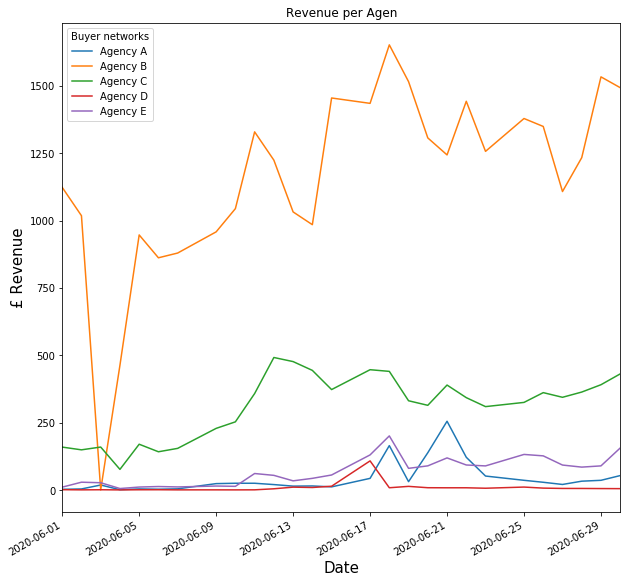

In [16]:
ax = pivot_agency.plot(figsize=(10,10))
plt.title('Revenue per Agen')
ylab = ax.set_ylabel('£ Revenue',fontsize=15)
xlab = ax.set_xlabel('Date',fontsize=15)

# Average CPMs broken down by agency

In [17]:
average_cpm_agency = df.groupby('Buyer networks').agg(avg_cpm=('Ad eCPM (£)', np.mean))

In [18]:
average_cpm_agency

,avg_cpm
Buyer networks,
Agency A,1.057894
Agency B,1.067520
Agency C,1.865317
Agency D,2.027026
Agency E,2.323132


In [19]:
ave_cpm_agency = df.groupby('Buyer networks').agg(rev_sum=('Revenue', sum),
                                         imp_sum=('Ad impressions', sum))

In [20]:
ave_cpm_agency

,rev_sum,imp_sum
Buyer networks,,
Agency A,1180.03,1173936
Agency B,31267.71,38017417
Agency C,8420.98,6257048
Agency D,241.29,133972
Agency E,1863.00,1065860


In [21]:
ave_cpm_agency['cpm'] = 1000* ave_cpm_agency['rev_sum']/ave_cpm_agency['imp_sum']

In [22]:
ave_cpm_agency

,rev_sum,imp_sum,cpm
Buyer networks,,,
Agency A,1180.03,1173936,1.005191
Agency B,31267.71,38017417,0.822458
Agency C,8420.98,6257048,1.345839
Agency D,241.29,133972,1.801048
Agency E,1863.00,1065860,1.747884


In [23]:
ave_cpm_agency.drop(['rev_sum', 'imp_sum'], axis=1, inplace=True)

In [53]:
ave_cpm_agency.sort_values(by='cpm',ascending=False).reset_index()

,Buyer networks,cpm
0,Agency D,1.801048
1,Agency E,1.747884
2,Agency C,1.345839
3,Agency A,1.005191
4,Agency B,0.822458


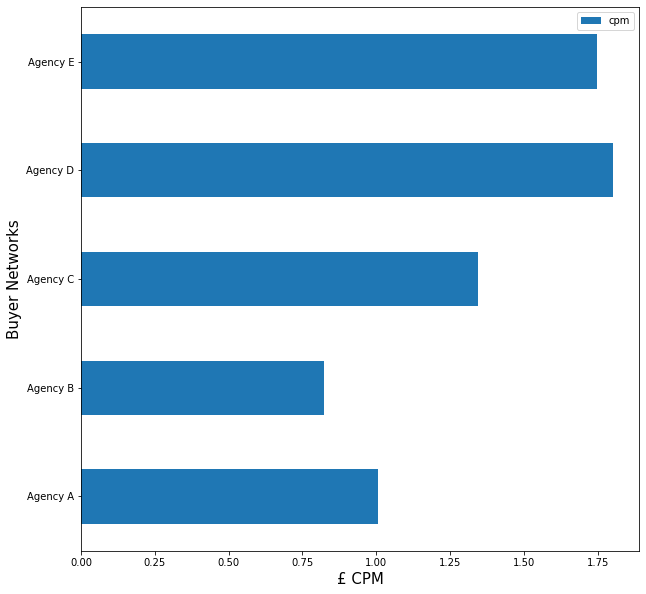

In [60]:
ave_cpm_agency.plot(kind='barh', figsize=(10,10))
plt.xlabel('£ CPM',fontsize=15)
plt.ylabel('Buyer Networks',fontsize=15)
plt.show()



# Creative Rev per network

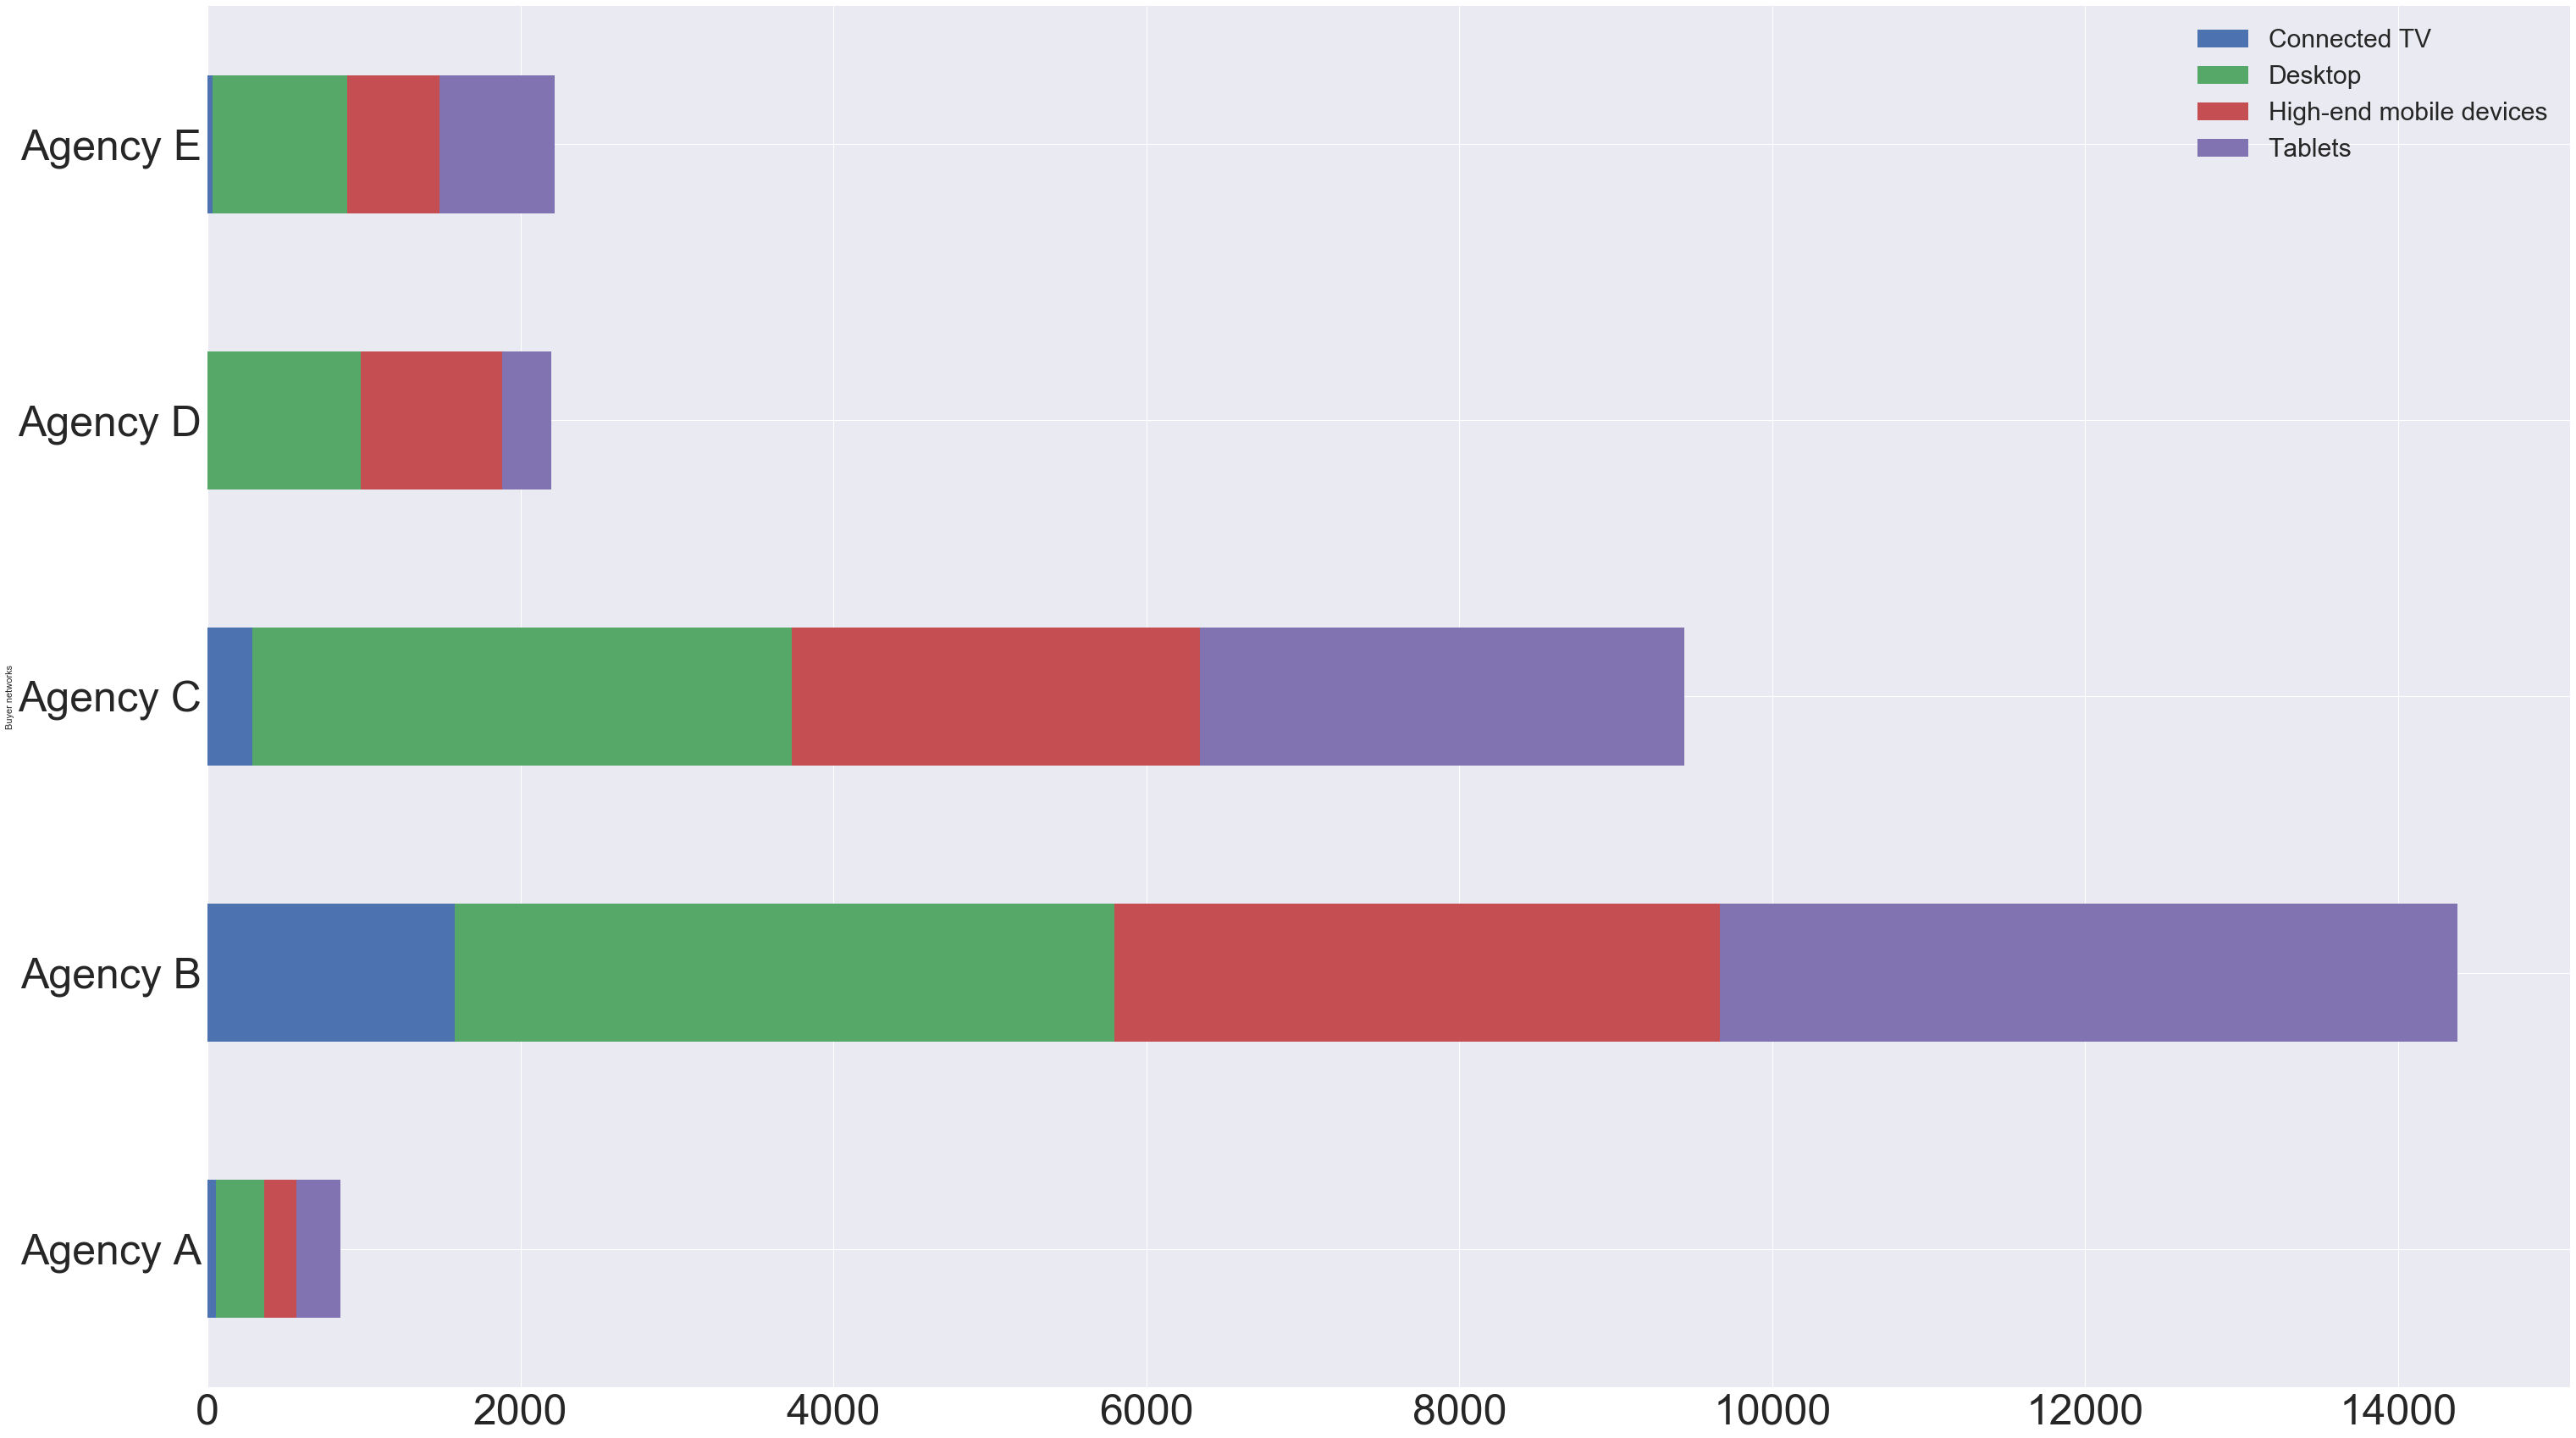

In [78]:
    zao = df.groupby(['Buyer networks', "Device categories"]).size().unstack().plot(kind='barh', stacked=True, figsize=(50,30))
   
    plt.legend(fontsize = 30)
    plt.xticks(fontsize = 50)
    plt.yticks(fontsize = 50)
  
    
    plt.style.use('seaborn')

In [101]:
x = df.groupby(['Buyer networks', "Device categories"]).agg(sum_rev=('Revenue', sum))

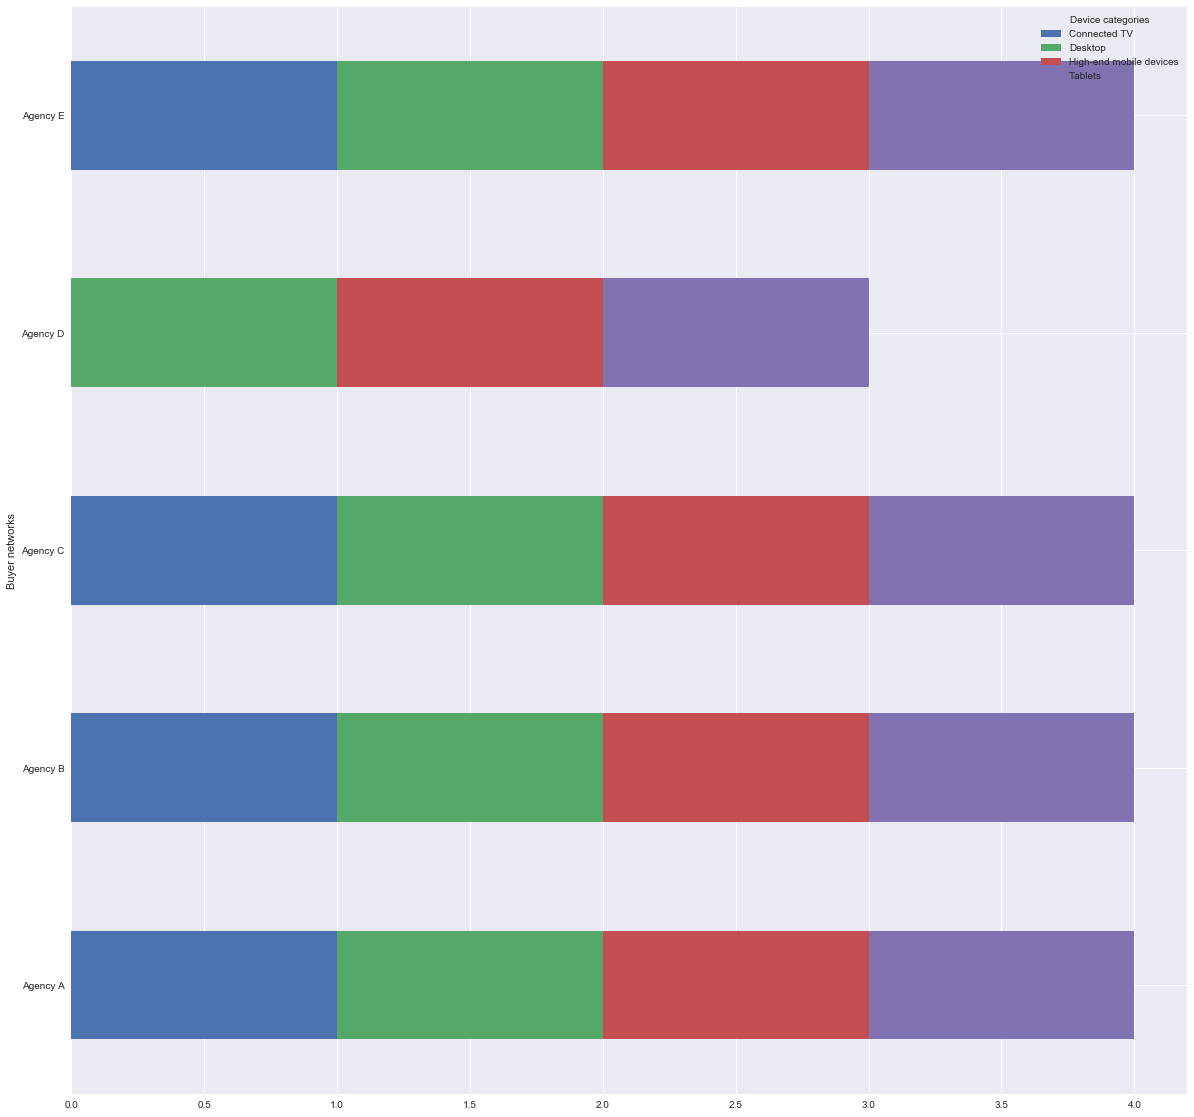

In [103]:
x.groupby(['Buyer networks', "Device categories"]).size().unstack().plot(kind='barh', stacked=True, figsize=(20,20
                                                                                                            ))

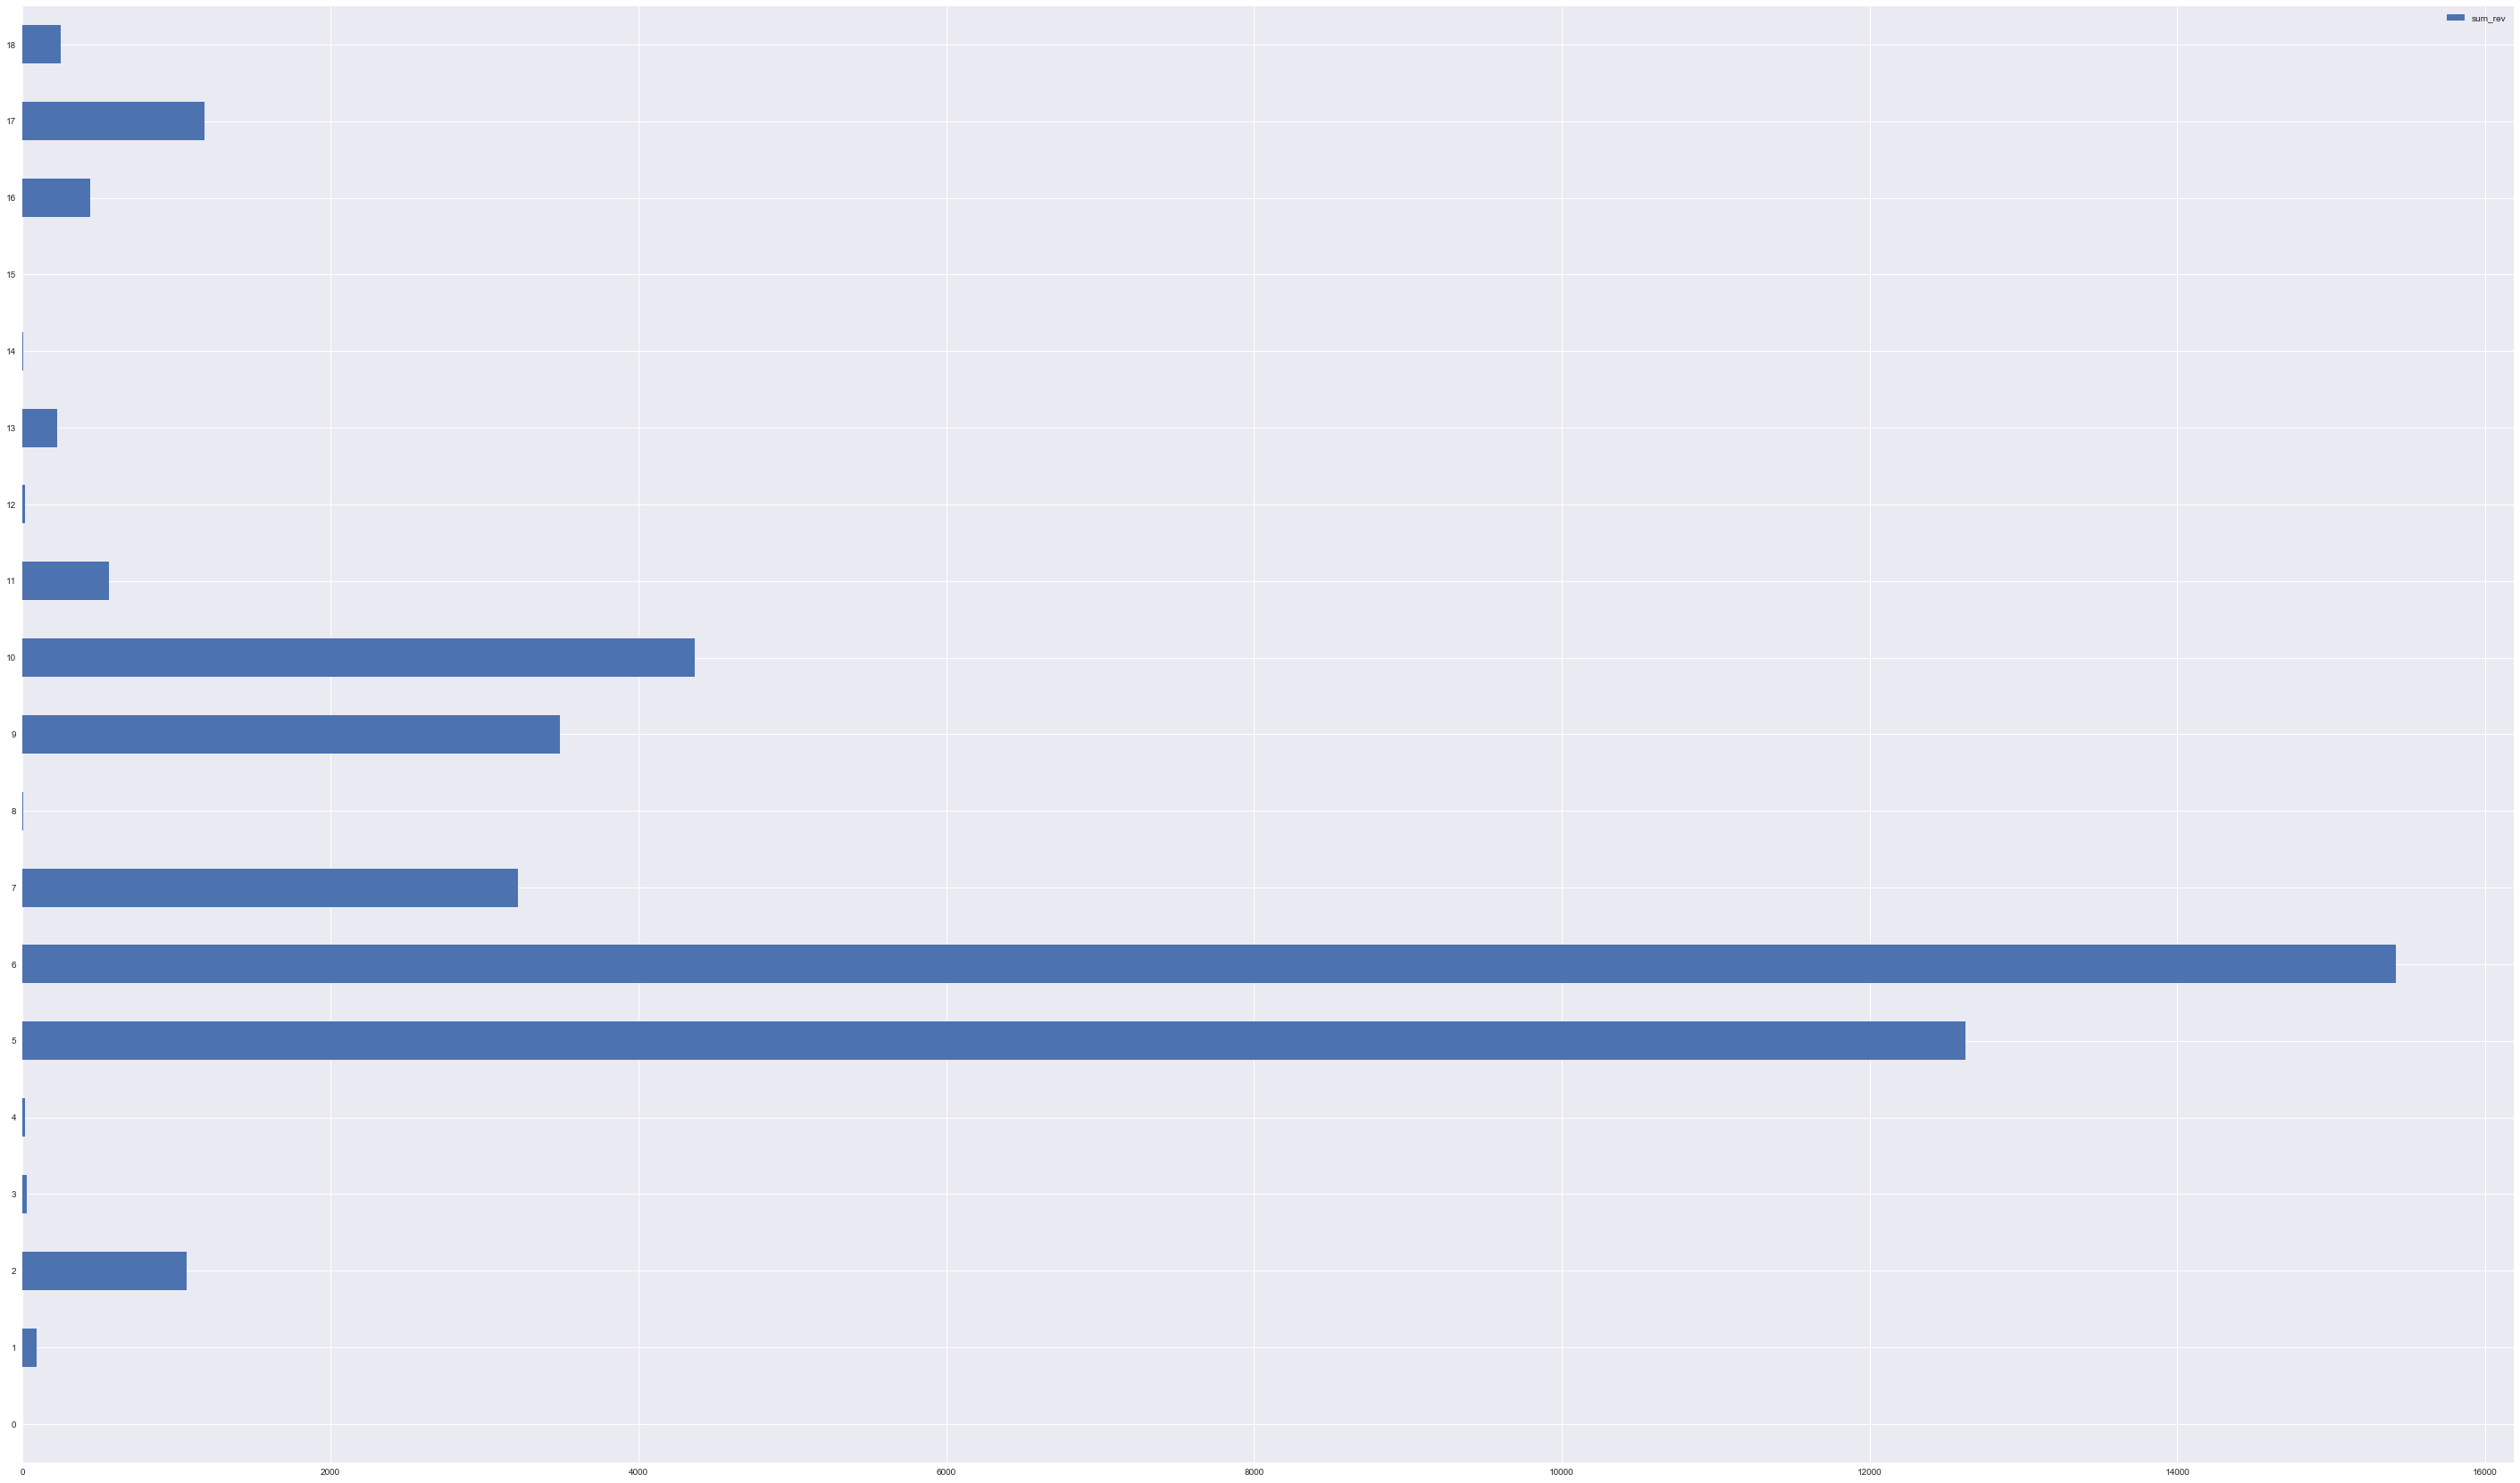

In [96]:
x.plot(kind='barh', stacked=True, figsize=(50,30))
   

# Creative size over time

In [26]:
# Prepare traffic data for variation by hour of the day (total)
pivot_creative_sum = pd.pivot_table(df, values='Revenue', columns='Creative size', index = 'Days',
                             aggfunc=sum)


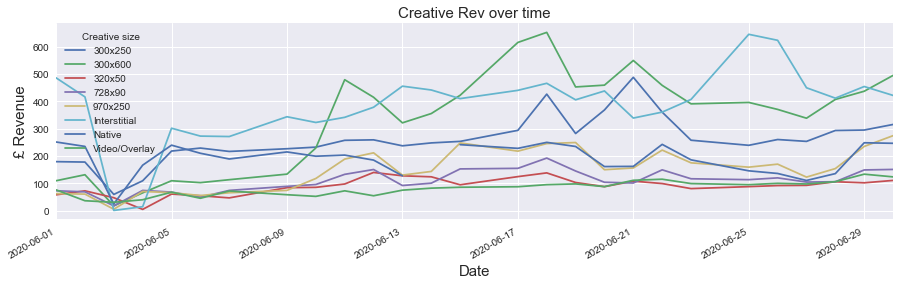

In [180]:
ax = pivot_creative_sum.plot(figsize=(15,4))
plt.title('Creative Rev over time', fontsize=15)
ylab = ax.set_ylabel('£ Revenue',fontsize=15)
xlab = ax.set_xlabel('Date',fontsize=15)

In [28]:
pivot_creative_min =  pd.pivot_table(df, values='Ad eCPM (£)', columns='Creative size', index = 'Days',
                             aggfunc=min)

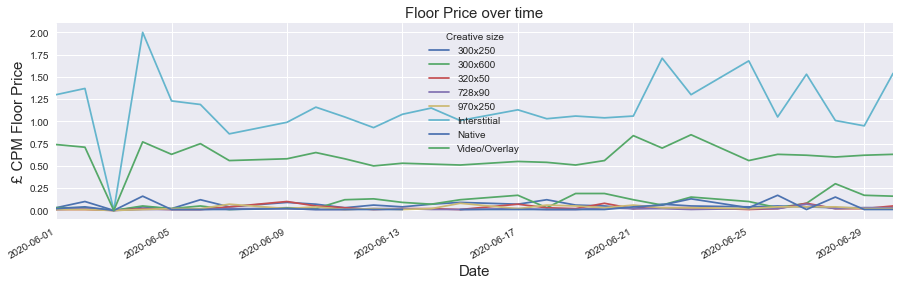

In [179]:
ax = pivot_creative_min.plot(figsize=(15,4))
plt.title('Floor Price over time',fontsize=15)
ylab = ax.set_ylabel('£ CPM Floor Price',fontsize=15)
xlab = ax.set_xlabel('Date',fontsize=15)

# Creative size overall

In [30]:
pivot_creative_rev = pd.pivot_table(df, values='Revenue', columns='Creative size',
                             aggfunc=sum)


In [31]:
pivot_creative_imp = pd.pivot_table(df, values='Ad impressions', columns='Creative size',
                             aggfunc=sum)

In [32]:
pivot_creative_cpm = pd.pivot_table(df, values='Ad eCPM (£)', columns='Creative size',
                             aggfunc=np.mean)

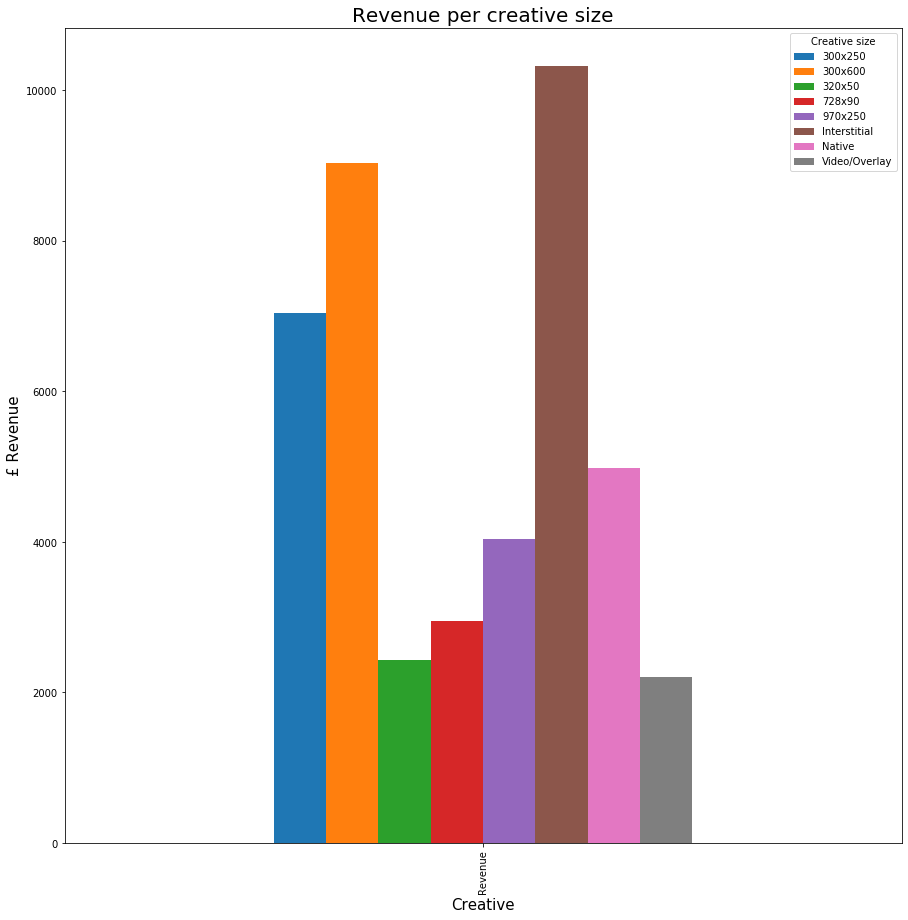

In [33]:
ax = pivot_creative_rev.plot(kind='bar',figsize = (15,15))
plt.title('Revenue per creative size', fontsize=20)
ylab = ax.set_ylabel('£ Revenue',fontsize=15)
xlab = ax.set_xlabel('Creative',fontsize=15)
plt.show()

In [204]:
creative_total = df.groupby('Creative size').agg(sum_rev=('Revenue', sum), impp= ('Ad impressions',sum))

In [205]:
creative_total.sort_values(by='sum_rev',inplace=True)

In [206]:
creative_total

,sum_rev,impp
Creative size,,
Video/Overlay,2202.00,634968
320x50,2433.43,3102621
728x90,2948.31,6728215
970x250,4031.85,6574038
Native,4976.63,5018375
300x250,7037.81,13518983
300x600,9026.22,8256964
Interstitial,10316.76,2814069


In [208]:
creative_total['impp'].sum()

46648233

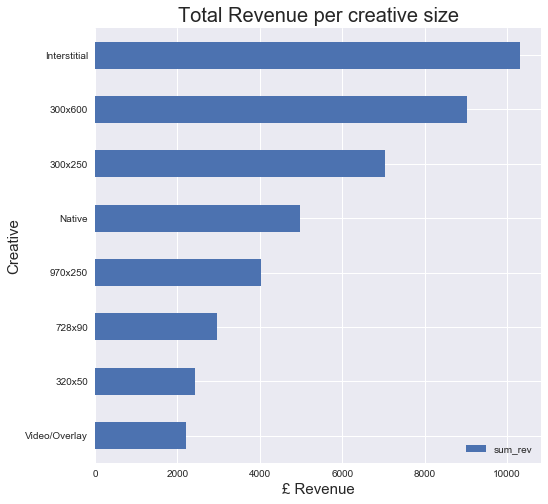

In [121]:
creative_total.plot(kind='barh',figsize=(8,8))
plt.title('Total Revenue per creative size', fontsize=20)
plt.ylabel('Creative',fontsize=15)
plt.xlabel('£ Revenue',fontsize=15)
plt.show()

In [122]:
creative_total_imp = df.groupby('Creative size').agg(imp_sum=('Ad impressions', sum))

In [123]:
creative_total_imp.sort_values(by='imp_sum',inplace=True)

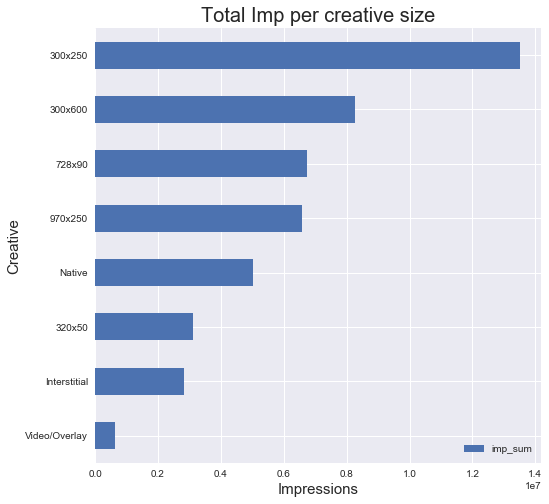

In [124]:
creative_total_imp.plot(kind='barh',figsize=(8,8))
plt.title('Total Imp per creative size', fontsize=20)
plt.ylabel('Creative',fontsize=15)
plt.xlabel('Impressions',fontsize=15)
plt.show()

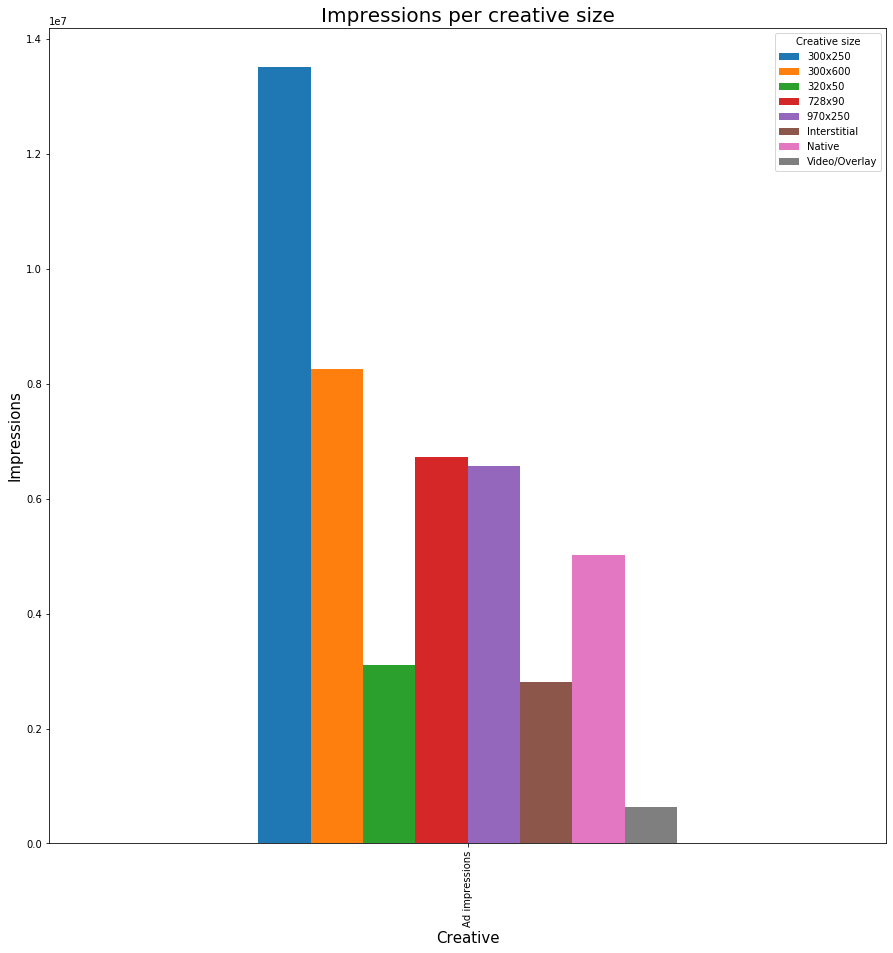

In [34]:
ax = pivot_creative_imp.plot(kind='bar',figsize = (15,15))
plt.title('Impressions per creative size', fontsize=20)
ylab = ax.set_ylabel('Impressions',fontsize=15)
xlab = ax.set_xlabel('Creative',fontsize=15)
plt.show()

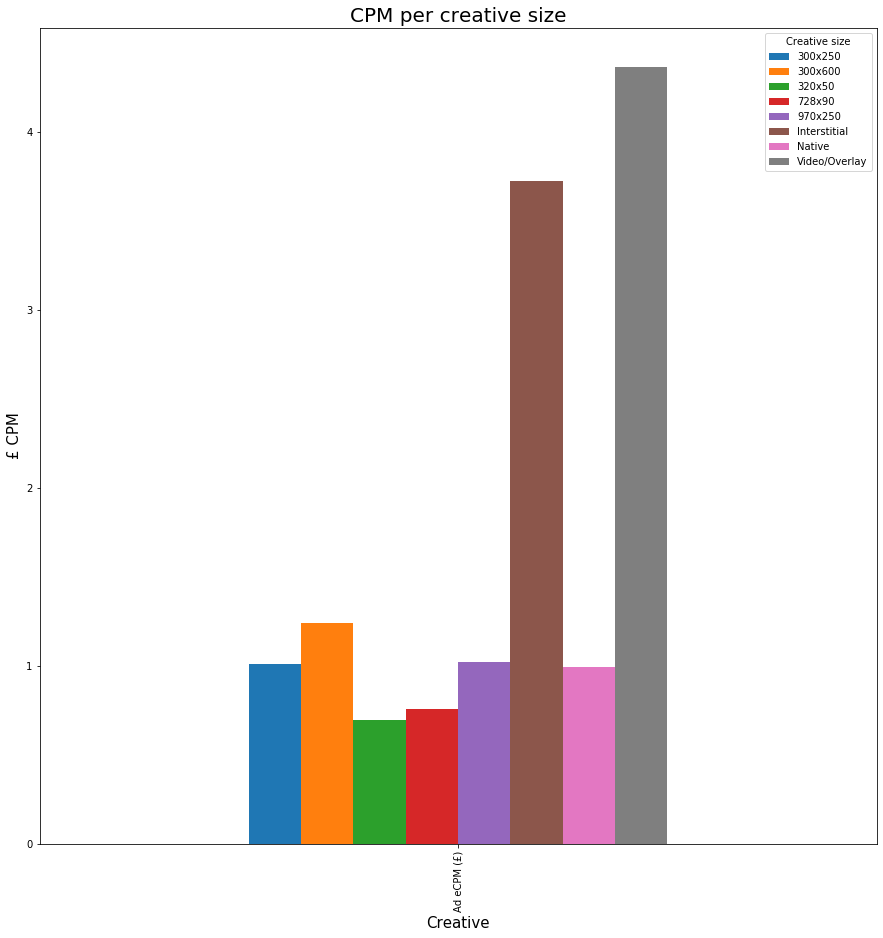

In [35]:
ax = pivot_creative_cpm.plot(kind='bar',figsize = (15,15))
plt.title('CPM per creative size', fontsize=20)
ylab = ax.set_ylabel('£ CPM',fontsize=15)
xlab = ax.set_xlabel('Creative',fontsize=15)
plt.show()

# Device Type Overall

In [36]:
pivot_device_rev = pd.pivot_table(df, values='Revenue', columns='Device categories',
                             aggfunc=sum)


In [37]:
pivot_device_imp = pd.pivot_table(df, values='Ad impressions', columns='Device categories',
                             aggfunc=sum)

In [38]:
pivot_device_cpm = pd.pivot_table(df, values='Ad eCPM (£)', columns='Device categories',
                             aggfunc=np.mean)

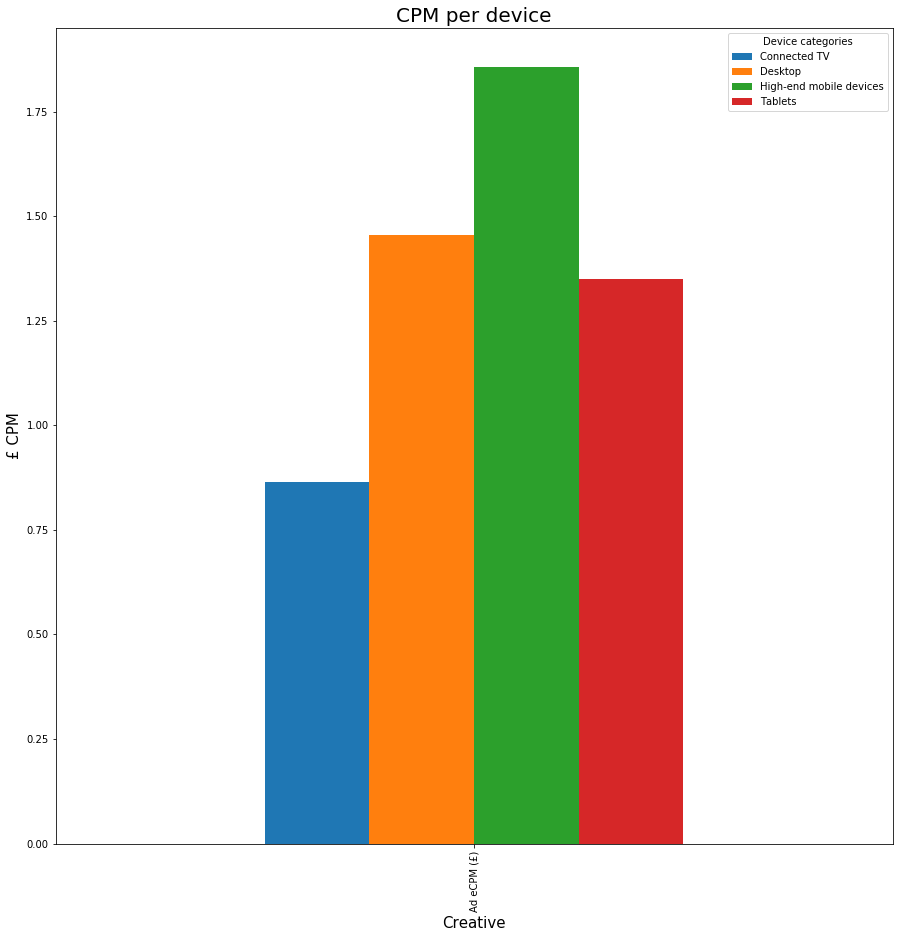

In [39]:
ax = pivot_device_cpm.plot(kind='bar',figsize = (15,15))
plt.title('CPM per device', fontsize=20)
ylab = ax.set_ylabel('£ CPM',fontsize=15)
xlab = ax.set_xlabel('Creative',fontsize=15)
plt.show()

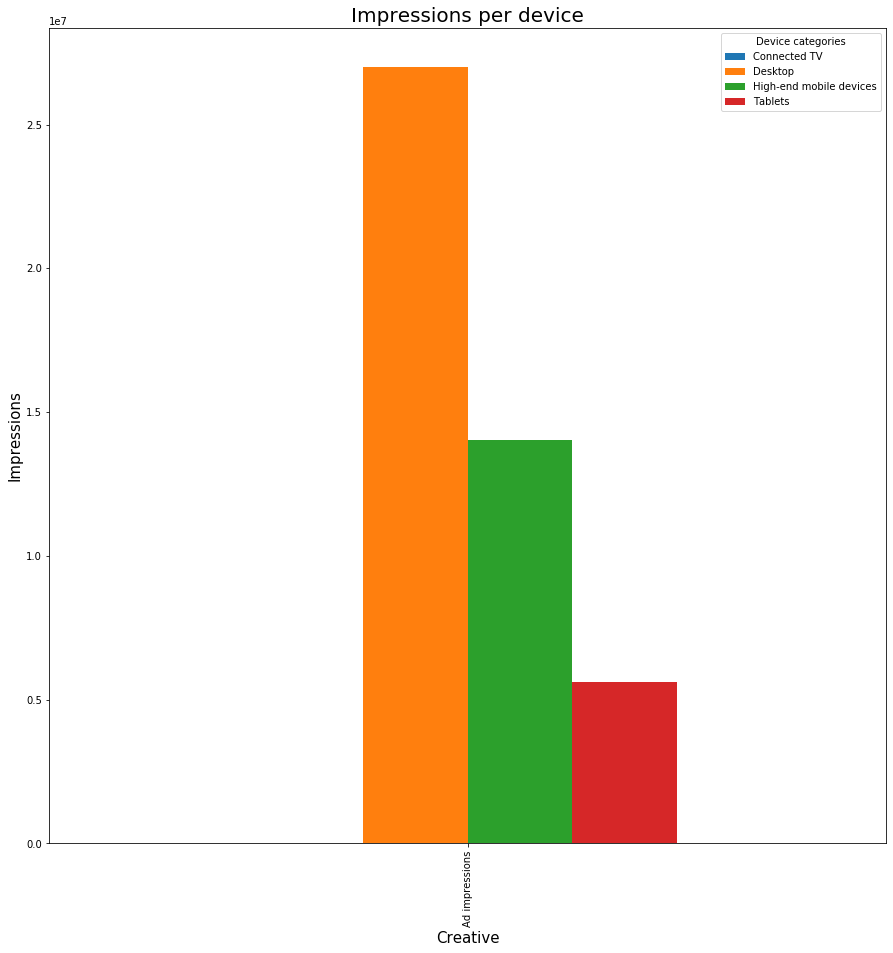

In [40]:
ax = pivot_device_imp.plot(kind='bar',figsize = (15,15))
plt.title('Impressions per device', fontsize=20)
ylab = ax.set_ylabel('Impressions',fontsize=15)
xlab = ax.set_xlabel('Creative',fontsize=15)
plt.show()

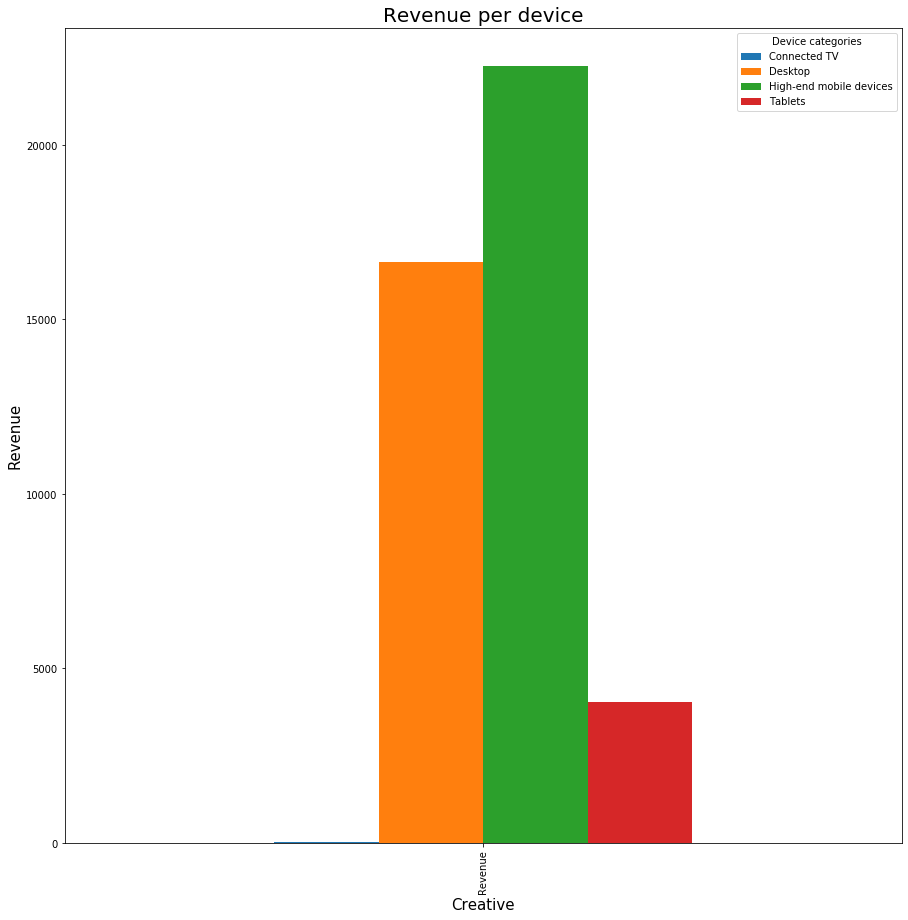

In [41]:
ax = pivot_device_rev.plot(kind='bar',figsize = (15,15))
plt.title('Revenue per device', fontsize=20)
ylab = ax.set_ylabel('Revenue',fontsize=15)
xlab = ax.set_xlabel('Creative',fontsize=15)
plt.show()

In [211]:
device_rev = df.groupby('Device categories').agg(sum_rev_=('Revenue', sum),impp_sum=('Ad impressions',sum))

In [212]:
device_rev.sort_values(by='sum_rev_',inplace=True)

In [213]:
device_rev

,sum_rev_,impp_sum
Device categories,,
Connected TV,17.79,24183
Tablets,4050.74,5598019
Desktop,16651.03,27006221
High-end mobile devices,22253.45,14019810


In [215]:
device_rev['cpm'] = device_rev['sum_rev_']/device_rev['impp_sum']*1000

In [216]:
device_rev

,sum_rev_,impp_sum,cpm
Device categories,,,
Connected TV,17.79,24183,0.735641
Tablets,4050.74,5598019,0.723602
Desktop,16651.03,27006221,0.616563
High-end mobile devices,22253.45,14019810,1.587286


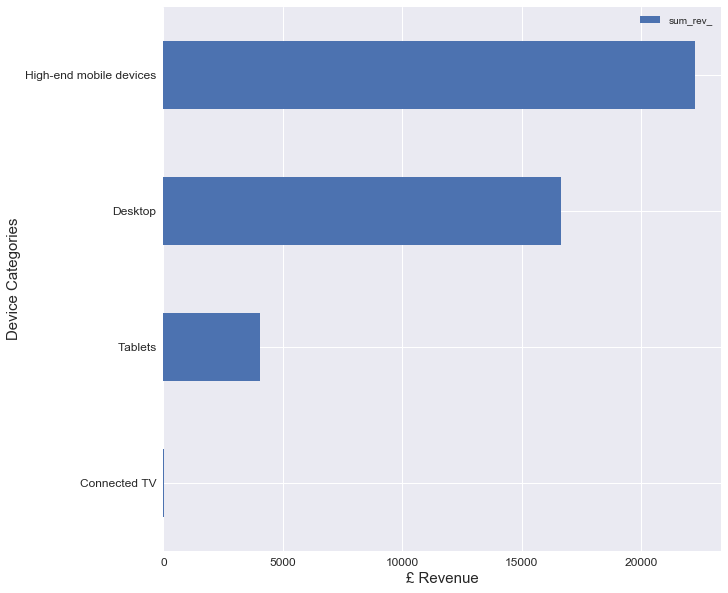

In [140]:
device_rev.plot(kind='barh',figsize=(10,10))
plt.xlabel('£ Revenue', fontsize=15)
plt.ylabel('Device Categories', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [141]:
device_imp = df.groupby('Device categories').agg(sum_imp_=('Ad impressions', sum))

In [142]:
device_imp.sort_values(by='sum_imp_',inplace=True)

In [144]:
device_imp

,sum_imp_
Device categories,
Connected TV,24183
Tablets,5598019
High-end mobile devices,14019810
Desktop,27006221


AttributeError: module 'matplotlib.pyplot' has no attribute 'ticker'

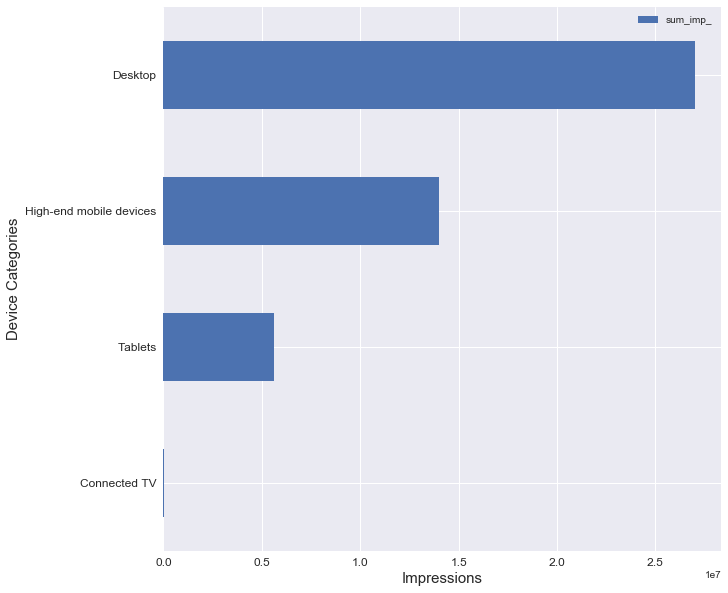

In [169]:
import matplotlib.ticker as mtick
device_imp.plot(kind='barh',figsize=(10,10))
plt.xlabel('Impressions', fontsize=15)
plt.ylabel('Device Categories', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.get_yaxis().set_major_formatter(
    plt.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

# Snapshot of Agency A

In [42]:
df_a = df.loc[df['Buyer networks']== 'Agency A']

In [43]:
df_a

,Days,Advertiser verticals,Device categories,Creative size,Buyer networks,Revenue,Ad impressions,Ad eCPM (£)
317,2020-06-01,Apparel,High-end mobile devices,320x50,Agency A,0.67,645,1.05
411,2020-06-01,Business & Industrial,Desktop,970x250,Agency A,0.39,315,1.25
479,2020-06-01,Apparel,High-end mobile devices,300x250,Agency A,0.24,187,1.28
489,2020-06-01,Business & Industrial,High-end mobile devices,300x600,Agency A,0.18,173,1.01
495,2020-06-01,Apparel,High-end mobile devices,300x600,Agency A,0.23,165,1.39
...,...,...,...,...,...,...,...,...
29035,2020-06-30,Business & Industrial,Tablets,320x50,Agency A,0.00,3,1.26
29042,2020-06-30,Apparel,Tablets,300x600,Agency A,0.00,3,0.67
29058,2020-06-30,Autos & Vehicles,Desktop,970x250,Agency A,0.01,2,4.14
29068,2020-06-30,Apparel,Desktop,320x50,Agency A,0.00,2,2.30


In [44]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 317 to 29073
Data columns (total 8 columns):
Days                    850 non-null datetime64[ns]
Advertiser verticals    850 non-null object
Device categories       850 non-null object
Creative size           850 non-null object
Buyer networks          850 non-null object
Revenue                 850 non-null float64
Ad impressions          850 non-null int64
Ad eCPM (£)             850 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 59.8+ KB


## Creative Size 

In [45]:
creative_a = df_a.groupby('Creative size').agg(sum_rev=('Revenue', sum))

In [46]:
creative_a

,sum_rev
Creative size,
300x250,920.55
300x600,40.15
320x50,142.76
728x90,26.49
970x250,50.08


In [47]:
creative_a.sort_values(by='sum_rev',inplace=True)

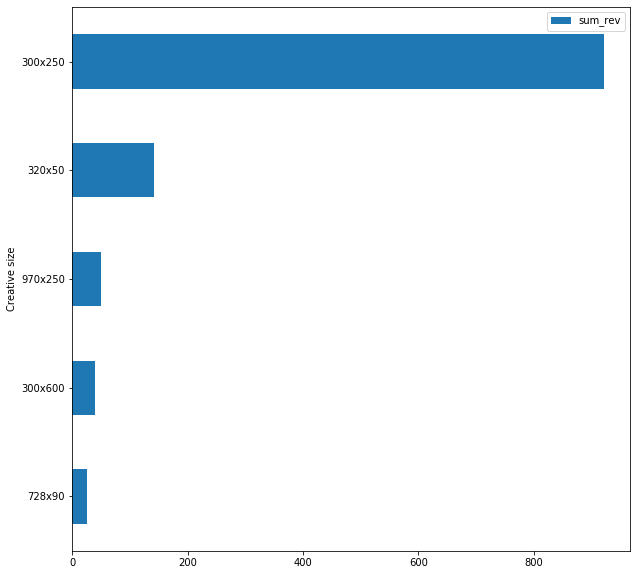

In [48]:
creative_a.plot(kind='barh',figsize=(10,10))
plt.show()

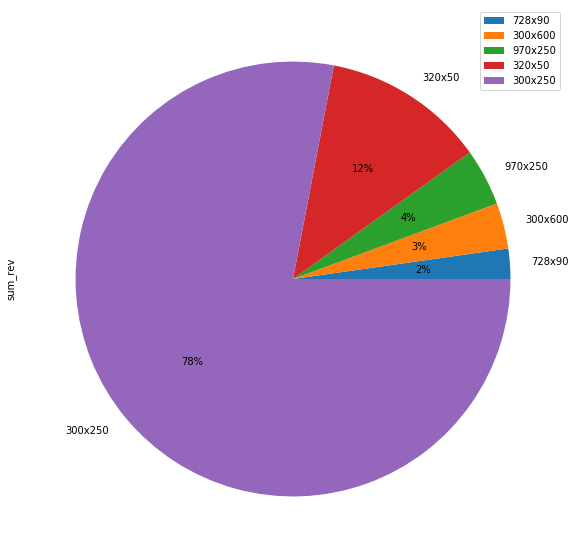

In [49]:
creative_a.plot.pie(y='sum_rev',figsize=(10,10), autopct='%1.0f%%')
plt.show()

In [50]:
creative_a_imp = df_a.groupby('Creative size').agg(sum_imp=('Ad impressions', sum))

# Verticals

In [191]:
verticals = df.groupby(by='Advertiser verticals').agg(sum_imp=('Ad impressions', sum), sum_rev_1 = ('Revenue', sum))

In [192]:
verticals['cpm'] = verticals['sum_rev_1']/verticals['sum_imp']*1000

In [195]:
verticals.sort_values('sum_rev_1',ascending=False,inplace=True)

In [196]:
verticals

,sum_imp,sum_rev_1,cpm
Advertiser verticals,,,
Finance,4718136,5310.01,1.125447
Autos & Vehicles,4384613,5291.30,1.206788
Apparel,6777830,4855.48,0.716377
Arts & Entertainment,2369000,3768.73,1.590853
Internet & Telecom,3311441,3540.35,1.069127
Computers & Consumer Electronics,3664468,3167.80,0.864464
"Hobbies, Games & Leisure",3621079,3122.82,0.862400
Business & Industrial,4525007,3019.24,0.667234
Health,1901076,1569.83,0.825759


In [197]:
verticals = verticals[:10]

In [198]:
verticals

,sum_imp,sum_rev_1,cpm
Advertiser verticals,,,
Finance,4718136,5310.01,1.125447
Autos & Vehicles,4384613,5291.30,1.206788
Apparel,6777830,4855.48,0.716377
Arts & Entertainment,2369000,3768.73,1.590853
Internet & Telecom,3311441,3540.35,1.069127
Computers & Consumer Electronics,3664468,3167.80,0.864464
"Hobbies, Games & Leisure",3621079,3122.82,0.862400
Business & Industrial,4525007,3019.24,0.667234
Health,1901076,1569.83,0.825759


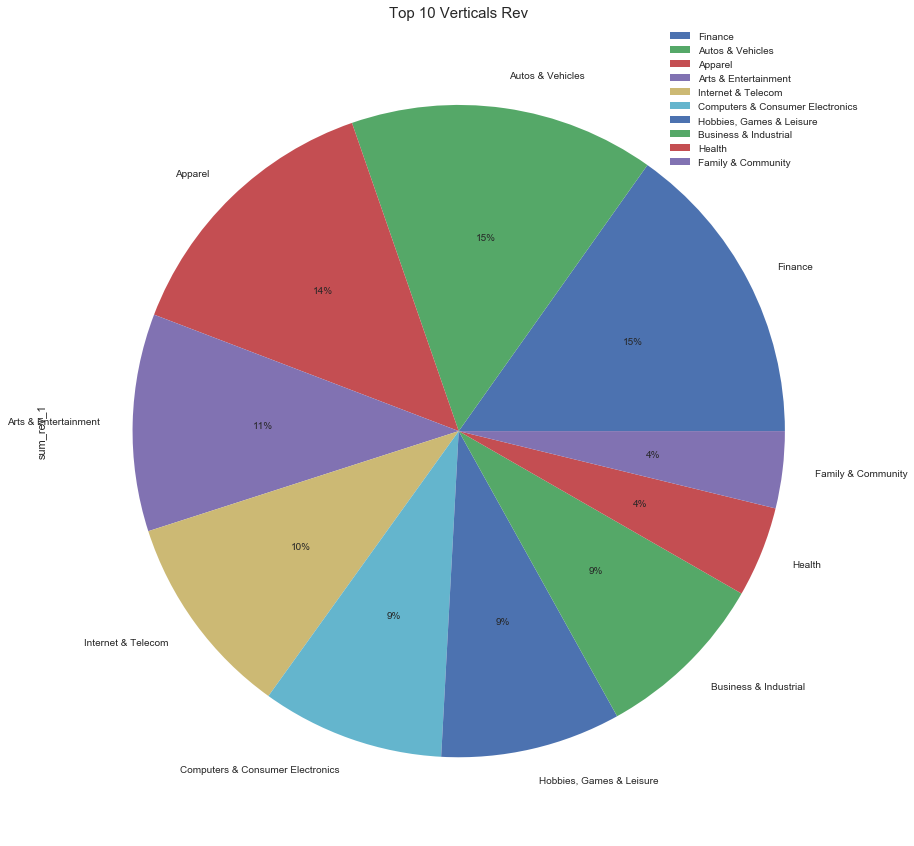

In [202]:
verticals.plot.pie(y='sum_rev_1',figsize=(15,15), autopct='%1.0f%%')
plt.title('Top 10 Verticals Rev',fontsize=15)
plt.show()